In [16]:
%matplotlib inline 
   
import ipywidgets as widgets    
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
from IPython.display import clear_output


In [17]:
image = cv2.imread('icon.png')

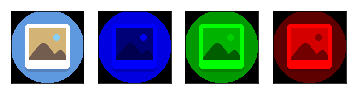

In [18]:

b = image.copy()
# set green and red channels to 0
b[:, :, 1] = 0
b[:, :, 2] = 0


g = image.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

r = image.copy()
# set blue and green channels to 0
r[:, :, 0] = 0
r[:, :, 1] = 0


plt.subplot(141)
plt.imshow(image) # Source Image (RGB)
plt.xticks([]), plt.yticks([])

plt.subplot(142)
plt.imshow(r) 
plt.xticks([]), plt.yticks([])

plt.subplot(143)

plt.imshow(g)
plt.xticks([]), plt.yticks([])

plt.subplot(144)
plt.imshow(b) 
plt.xticks([]), plt.yticks([])

plt.show()

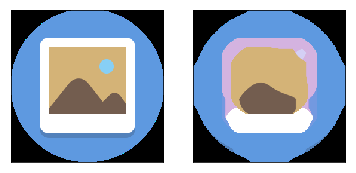

In [19]:
b, g, r = cv2.split(image)

plt.subplot(121)
plt.imshow(np.dstack((b, g, r))) 
plt.xticks([]), plt.yticks([])

param = 51

_b = cv2.medianBlur(b, param)
_g = cv2.medianBlur(g, param)
_r = cv2.medianBlur(r, param)

rgb = np.dstack((_b, _g, _r))


plt.subplot(122)
plt.imshow(rgb) 
plt.xticks([]), plt.yticks([])
plt.show()

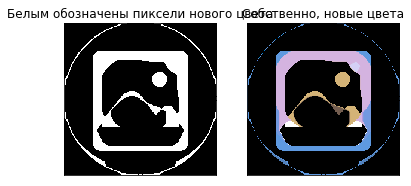

In [23]:
im = np.zeros(image.shape)
newcolors = rgb.copy()
im = rgb - image
for i in np.arange(image.shape[0]):
    for j in np.arange(image.shape[1]):
#         print(i, j)
        if np.array_equal(image[i, j], newcolors[i, j]):
            im[i, j] = [0, 0, 0]
            newcolors[i, j] = [0, 0, 0]
        else:
            im[i, j] = [255, 255, 255]

plt.subplot(121)
plt.title("Белым обозначены пиксели нового цвета")
plt.xticks([]), plt.yticks([])
plt.imshow(im)

plt.subplot(122)
plt.title("Собственно, новые цвета")
plt.imshow(newcolors)
plt.xticks([]), plt.yticks([])
plt.show()